# Testing out rolling smoothing functions

In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jmspack.utils import apply_scaling
from sklearn.metrics import mean_squared_error
from tsfresh.feature_extraction.feature_calculators import (abs_energy, agg_autocorrelation, 
                                                            agg_linear_trend, benford_correlation, 
                                                            kurtosis, skewness, mean_change,
                                                            mean_second_derivative_central,
                                                            root_mean_square, sample_entropy,
                                                            sum_values, variation_coefficient)

In [11]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
df = sns.load_dataset("mpg")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
feature_list = ["mpg", "displacement", "horsepower", "weight"]

### Plotting original time series

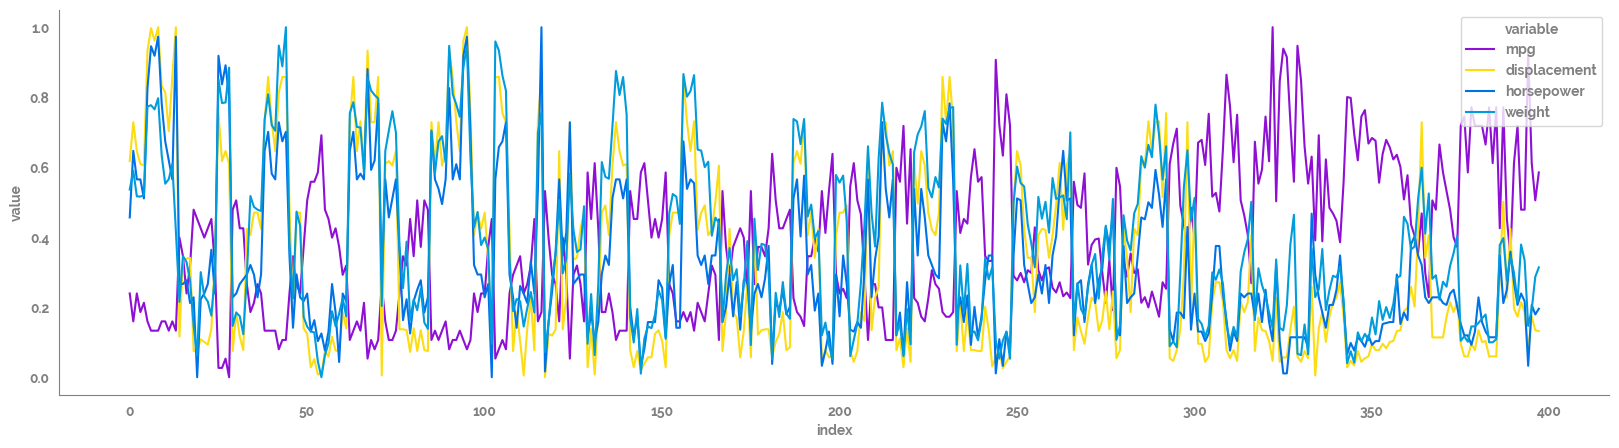

In [14]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df[feature_list]
                .pipe(apply_scaling)
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()

### Plotting smoothing functions

In [47]:
comparison_feature = feature_list[1]

In [144]:
assign_dict = {"mean": lambda d: d[comparison_feature].rolling(window=window_size).mean().shift(int(-window_size/2)),
                "median": lambda d: d[comparison_feature].rolling(window=window_size).median().shift(int(-window_size/2)),
                # "std": lambda d: d[comparison_feature].rolling(window=window_size).std().shift(int(-window_size/2)),
                # "min": lambda d: d[comparison_feature].rolling(window=window_size).min().shift(int(-window_size/2)),
                # "max": lambda d: d[comparison_feature].rolling(window=window_size).max().shift(int(-window_size/2)),
                "abs_energy": lambda d: d[comparison_feature].rolling(window=window_size).agg(abs_energy).shift(int(-window_size/2)),
                # "mean_change": lambda d: d[comparison_feature].rolling(window=window_size).agg(mean_change).shift(int(-window_size/2)),
                # "mean_second_derivative_central": lambda d: d[comparison_feature].rolling(window=window_size).agg(mean_second_derivative_central).shift(int(-window_size/2)),
                "root_mean_square": lambda d: d[comparison_feature].rolling(window=window_size).agg(root_mean_square).shift(int(-window_size/2)),
                "sum_values": lambda d: d[comparison_feature].rolling(window=window_size).agg(sum_values).shift(int(-window_size/2)),
                # "variation_coefficient": lambda d: d[comparison_feature].rolling(window=window_size).agg(variation_coefficient).shift(int(-window_size/2)),
                # "sample_entropy": lambda d: d[comparison_feature].rolling(window=window_size).agg(sample_entropy).shift(int(-window_size/2)),
                # "benford_correlation": lambda d: d[comparison_feature].rolling(window=window_size).agg(benford_correlation).shift(int(-window_size/2)),
                # "kurtosis": lambda d: d[comparison_feature].rolling(window=window_size).agg(kurtosis).shift(int(-window_size/2)),
                # "skewness": lambda d: d[comparison_feature].rolling(window=window_size).agg(skewness).shift(int(-window_size/2)),
                # "agg_autocorrelation": lambda d: d[comparison_feature].rolling(window=window_size).agg(agg_autocorrelation, param={"f_agg": "mean", "maxlag": 1}).shift(int(-window_size/2)),
                # "agg_linear_trend": lambda d: d[comparison_feature].rolling(window=window_size).agg(agg_linear_trend).shift(int(-window_size/2)),
                }

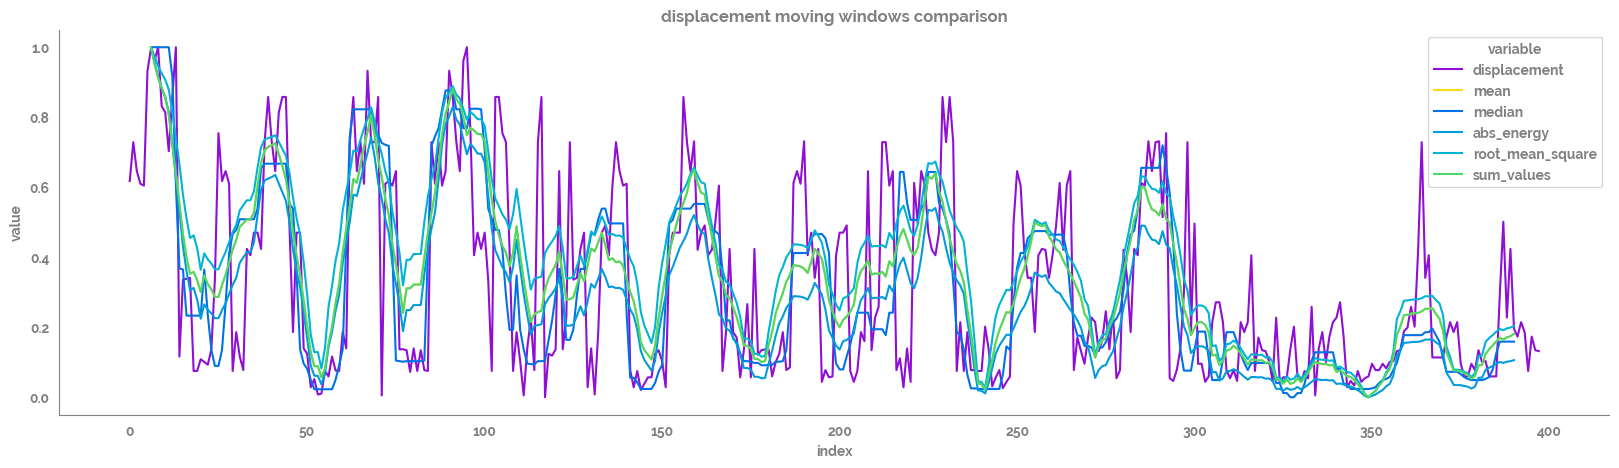

In [145]:
window_size=14
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df[[comparison_feature]]
                .assign(**assign_dict)
                # .drop(comparison_feature, axis=1)
                .pipe(apply_scaling)
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = plt.title(f"{comparison_feature} moving windows comparison")
_ = sns.despine()

### Comparing smoothed data to real data using RMSE()

In [146]:
def RMSE(true, pred):
    return np.sqrt(mean_squared_error(y_true=true, y_pred=pred))

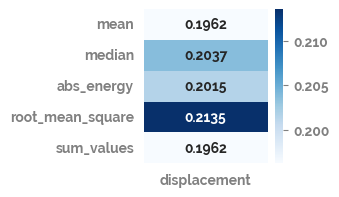

In [147]:
comp_df = (df[[comparison_feature]]
                .assign(**assign_dict)
                .pipe(apply_scaling)
                .dropna()
                )
rmse_df = pd.concat([pd.DataFrame({f"{comparison_feature}": RMSE(comp_df[comparison_feature], comp_df[y])}, index=[y]) for y in comp_df.drop(comparison_feature, axis=1)])
_ = plt.figure(figsize=(2,2))
_ = sns.heatmap(data=rmse_df,
                annot=True,
                fmt=".4g",
                cmap="Blues")
_ = plt.yticks(rotation=0)